In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import statistics
import kmax as kx
import utility as util
from hierarchy import *
from scipy.optimize import fsolve
from IPython.core.debugger import set_trace
import scipy.stats as stats
import pylab
import statsmodels.api as sm

# Simulations 2

## Length case ($\omega_e=1$)

In [6]:
def iterate_GWBP_EX_N(lam, num_samples=100):
    X_Ns = []
    for _ in range(num_samples):
        # Poisson Branching
        sample_tree = nx.Graph(GWBP(lam, MAXLEVEL=100))
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Get X for sample_tree
        _,_,X = util.path_cover(sample_tree, list(sample_tree.nodes())[0])
            
        # Calculate X/N for current sample
        # GW Branching Process produces a single connected (tree) component, so N = |V|
        X_Ns.append(X / nx.number_of_nodes(sample_tree))
    return X_Ns

def X_sample_GNP(sample_tree):
    X = 0
    for nodes in nx.connected_components(sample_tree):
        subgraph = sample_tree.subgraph(nodes)
        _, _, Xi = util.path_cover(subgraph, list(nodes)[0])
        X += Xi
    return X

def iterate_GNP(lam, num_samples=1000, n=10000):
    X_Ns = []
    for _ in range(num_samples):
        # Erdos-Reyni Graph
        sample_tree = nx.fast_gnp_random_graph(n, lam/n)
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Calculate X/n for current sample
        X_Ns.append(X_sample_GNP(sample_tree) / n)
    return X_Ns

def generate_histogram(l, dataset, bins = np.arange(0,100,1), title = None):
    plt.figure(figsize=(6,6))
    plt.hist(dataset, bins=bins, edgecolor = 'black', linewidth=1.2, color = 'lightblue')
    # plt.xticks()
    if title:
        plt.title(title, fontfamily=['Serif'])
    else:
        plt.title(f"lambda = {l}", fontfamily=['Serif'])
    plt.xlabel("$100 \cdot X_N/N$", fontfamily=['Serif'], fontsize=12)
    plt.show()

def generate_plot(xs, ys, xlabel = None, ylabel = None, title = None, xdim = 6, ydim = 6):
    plt.figure(figsize=(xdim,ydim))
    plt.plot(xs, ys)
    if xlabel:
        plt.xlabel(xlabel, fontsize = 12, fontfamily=['Serif'])
    if ylabel:
        plt.ylabel(ylabel, fontsize=12, fontfamily=['Serif'])
    if title:
        plt.title(title, fontfamily=['Serif'])
    plt.grid(True)
    plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Charles\AppData\Local\Temp\ipykernel_33788\1937848063.py:45: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$100 \cdot X_N/N$", fontfamily=['Serif'], fontsize=12)


In [105]:
#generate data will save to csv
LAM = 0.7
GWBP_XNs = iterate_GWBP_EX_N(LAM, 10000)
GWBP_XNs_modified = [100 * x for x in GWBP_XNs]

In [106]:
LAM = 0.7
n = 1000
ER_XNs = iterate_GNP(0.7, 100, n)
m = np.mean(ER_XNs)
ER_XNs_centered = [x - m for x in ER_XNs]
ER_XNs_centered_scaled = [np.sqrt(n) * x for x in ER_XNs_centered]
ER_XNs_modified = [100 * x for x in ER_XNs_centered_scaled]
print(ER_XNs_modified)

[np.float64(-39.78145296491832), np.float64(-1.8341210428977388), np.float64(36.113210879122846), np.float64(23.46410023844932), np.float64(-125.16294978946448), np.float64(26.626377898617697), np.float64(-118.83839446912769), np.float64(-30.294619984413178), np.float64(1.3281566172706432), np.float64(29.788655558786083), np.float64(17.139544918112552), np.float64(-4.996398703066121), np.float64(7.652711937607408), np.float64(-36.61917530474994), np.float64(23.46410023844932), np.float64(-30.294619984413178), np.float64(32.95093321895447), np.float64(42.43776619945961), np.float64(7.652711937607408), np.float64(-8.158676363234504), np.float64(-4.996398703066121), np.float64(-4.996398703066121), np.float64(-4.996398703066121), np.float64(77.22282046131181), np.float64(-46.10600828525509), np.float64(13.97726725794417), np.float64(-49.268285945423465), np.float64(-49.268285945423465), np.float64(39.275488539291224), np.float64(-17.645509343739647), np.float64(-55.59284126576023), np.floa

In [75]:
print(ER_XNs_modified)

[np.float64(1043.5516278555651), np.float64(983.468352312366), np.float64(1011.9288512538814), np.float64(1046.7139055157336), np.float64(1043.5516278555651), np.float64(1002.4420182733763), np.float64(1024.577961894555), np.float64(939.1964650700087), np.float64(1008.7665735937131), np.float64(1040.389350195397), np.float64(1056.2007384962387), np.float64(948.6832980505138), np.float64(1056.2007384962387), np.float64(942.358742730177), np.float64(932.871909749672), np.float64(1005.6042959335447), np.float64(970.8192416716925), np.float64(970.8192416716925), np.float64(1018.2534065742182), np.float64(1065.6875714767439), np.float64(992.9551852928711), np.float64(961.3324086911873), np.float64(948.6832980505138), np.float64(1068.8498491369123), np.float64(1078.3366821174172), np.float64(1015.0911289140497), np.float64(1040.389350195397), np.float64(1062.5252938165754), np.float64(999.2797406132079), np.float64(1116.284014039438), np.float64(986.6306299725343), np.float64(992.95518529287

### Histogram

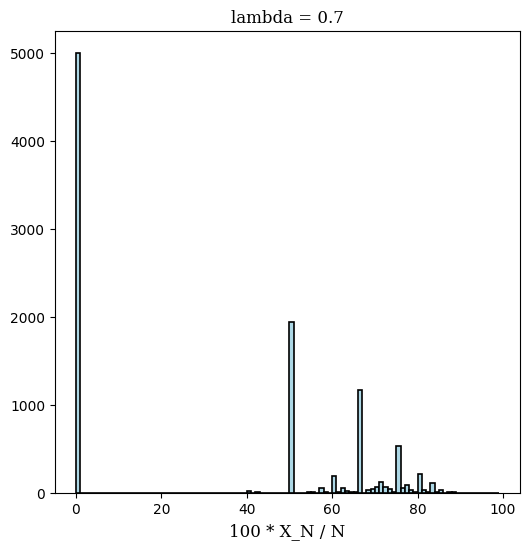

In [101]:
generate_histogram(LAM, GWBP_XNs_modified, title=f'Histogram of $X_n/n$ for GWBP $(\lambda={LAM})$')

In [1]:
generate_histogram(LAM, ER_XNs_modified, bins = np.arange(-100, 100, 1),  title=f'Histogram of $X_n/sqrt(n)$ for $G(n,\lambda/n)$ $(\lambda={LAM})$')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Charles\AppData\Local\Temp\ipykernel_33788\1432965169.py:1: SyntaxWarning: invalid escape sequence '\l'
  generate_histogram(LAM, ER_XNs_modified, bins = np.arange(-100, 100, 1),  title=f'Histogram of $X_n/sqrt(n)$ for $G(n,\lambda/n)$ $(\lambda={LAM})$')
C:\Users\Charles\AppData\Local\Temp\ipykernel_33788\1432965169.py:1: SyntaxWarning: invalid escape sequence '\l'
  generate_histogram(LAM, ER_XNs_modified, bins = np.arange(-100, 100, 1),  title=f'Histogram of $X_n/sqrt(n)$ for $G(n,\lambda/n)$ $(\lambda={LAM})$')


NameError: name 'generate_histogram' is not defined

### q-q Plot

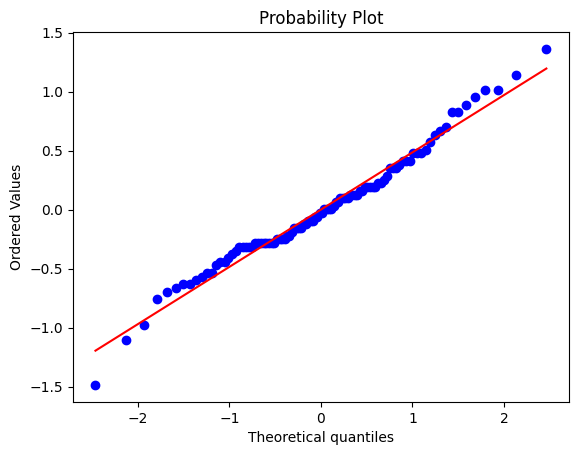

In [99]:
stats.probplot(ER_XNs_centered_scaled, dist = "norm", plot=pylab)
pylab.show()


# Statistics, Variance v.s. Lambda

In [52]:
var_ER = np.var(ER_XNs_modified)
mean_ER = np.mean(ER_XNs_modified)
print("mean: ", mean_ER)
print("var:", var_ER)

mean:  31.588099999999997
var: 2.197448390000002


In [19]:
def run_test(l, ns = np.arange(100, 1000, 100)):
    vars_over_n = []
    for n in ns:
        data = iterate_GNP(l, 50, n)
        # need to multiply by n because iterate returns X_n / n instead of just X_n
        data = [n * x for x in data]
        v = np.var(data)
        von = v / n
        vars_over_n.append(von)
    return (l, vars_over_n)

def run_test_multiple_lambdas(ls = np.arange(0.1,1,0.2).round(1), ns = np.arange(100, 1000, 100)):
    data = []
    for l in ls:
        print(l)
        data.append(run_test(l, ns))
    return data

def lambda_var_means(data):
    return [(l, np.mean(von)) for (l, von) in data]




In [20]:
data = run_test_multiple_lambdas()
print(lambda_var_means(data))

0.1
0.30000000000000004


KeyboardInterrupt: 

In [16]:
print(np.arange(0.1,1,0.2).round(1))

[0.1 0.3 0.5 0.7 0.9]


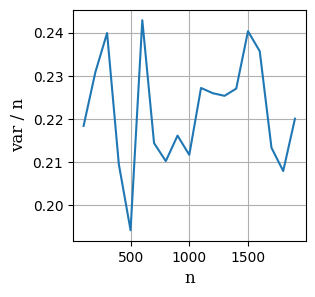

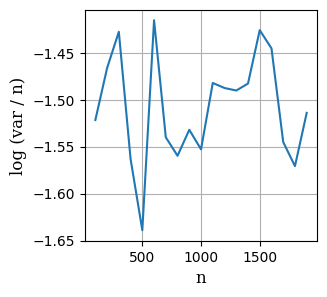

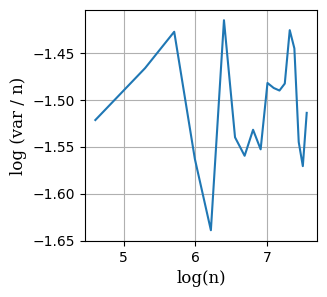

In [63]:
# generate_plot(ns, vars_over_n, xlabel =  "n", ylabel= "var / n", xdim = 3, ydim = 3)
# generate_plot(ns, np.log(vars_over_n), xlabel =  "n", ylabel= "log (var / n)", xdim = 3, ydim = 3)
# generate_plot(np.log(ns), np.log(vars_over_n), xlabel =  "log(n)", ylabel= "log (var / n)", xdim = 3, ydim = 3)



## Weight case ($\omega_e\sim\mathcal{U}(0,1)$)